# MOSAIKS and Poverty at ADM0

In [1]:
import pickle
from pathlib import Path
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

import child_poverty_iraq.data.load_data as ld
import child_poverty_iraq.utils.constants as c

In [2]:
mosaiks_adm0 = ld.get_mosaiks_adm0()
print(mosaiks_adm0.shape)
mosaiks_adm0.head(2)

(170, 4001)


,shapeGroup,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_3990,X_3991,X_3992,X_3993,X_3994,X_3995,X_3996,X_3997,X_3998,X_3999
0,AFG,0.222622,0.531475,0.063786,0.558549,0.347770,0.414391,0.065748,0.117015,0.503298,...,0.179174,0.093681,0.311995,0.209025,0.143233,0.705094,1.037524,0.282320,0.480521,0.046580
1,AGO,0.073747,0.295667,0.009288,0.367868,0.149731,0.149445,0.047871,0.049597,0.330519,...,0.100405,0.017546,0.096324,0.064604,0.059373,0.566319,0.616133,0.313304,0.425567,0.011851


In [3]:
pov_adm0 = ld.get_poverty_adm0()
print(pov_adm0.shape)
pov_adm0.head(2)


(85, 7)


,countrycode,survey,survey_round,year_chpov,nat_deprived_sev,nat_deprived_mod,popnational0017
0,AFG,DHS,71.0,2015.0,82.904877,93.396584,19895792.0
1,AGO,DHS,71.0,2015.0,61.446869,85.699501,17296062.0


In [4]:
adm0 = pd.merge(pov_adm0, mosaiks_adm0, how='left', left_on = 'countrycode', right_on = 'shapeGroup')
adm0.drop(columns=['shapeGroup'], inplace=True)
print(adm0.shape)
adm0.head(2)

(85, 4007)


,countrycode,survey,survey_round,year_chpov,nat_deprived_sev,nat_deprived_mod,popnational0017,X_0,X_1,X_2,...,X_3990,X_3991,X_3992,X_3993,X_3994,X_3995,X_3996,X_3997,X_3998,X_3999
0,AFG,DHS,71.0,2015.0,82.904877,93.396584,19895792.0,0.222622,0.531475,0.063786,...,0.179174,0.093681,0.311995,0.209025,0.143233,0.705094,1.037524,0.282320,0.480521,0.046580
1,AGO,DHS,71.0,2015.0,61.446869,85.699501,17296062.0,0.073747,0.295667,0.009288,...,0.100405,0.017546,0.096324,0.064604,0.059373,0.566319,0.616133,0.313304,0.425567,0.011851


# Shapefile for ADM0

In [6]:
import requests
import os


In [7]:
geom_adm0 = ld.get_mosaiks_geom_adm0()
print(geom_adm0.shape)
geom_adm0.head(2)

The file '../data/external/geoBoundariesCGAZ_ADM0.topojson' exists.


(198, 7)


,id,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,NaN,Cuba,CUB,CUB-ADM0-3_0_0-B1,CUB,ADM0,"MULTIPOLYGON (((-78.38430 20.53884, -78.38512 ..."
1,NaN,Denmark,DNK,DNK-ADM0-3_0_0-B1,DNK,ADM0,"MULTIPOLYGON (((11.19136 54.96003, 11.19308 54..."


In [8]:
# Add geometry
adm0 = pd.merge(adm0, geom_adm0[['shapeGroup', 'geometry']], how='left', left_on='countrycode', right_on='shapeGroup')
adm0 = gpd.GeoDataFrame(adm0)


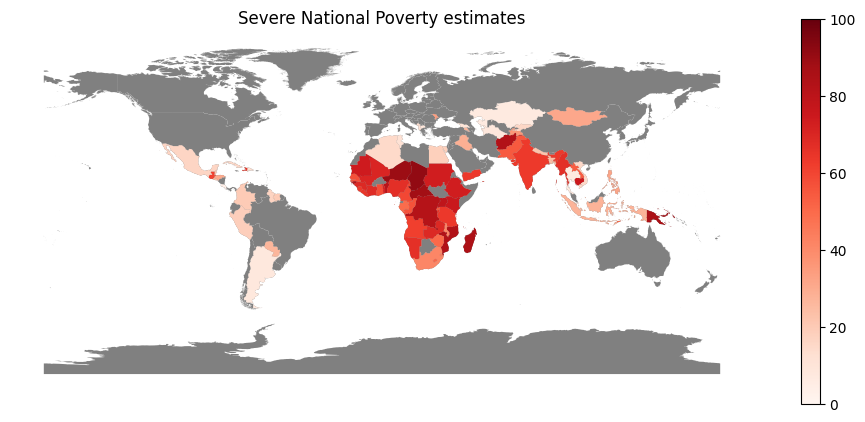

In [9]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')
# Plot countries with national poverty estimates
adm0.plot(ax=ax, column='nat_deprived_sev', cmap='Reds', legend=True, vmin=0, vmax=100)

plt.title('Severe National Poverty estimates')
plt.axis('off')
plt.show()


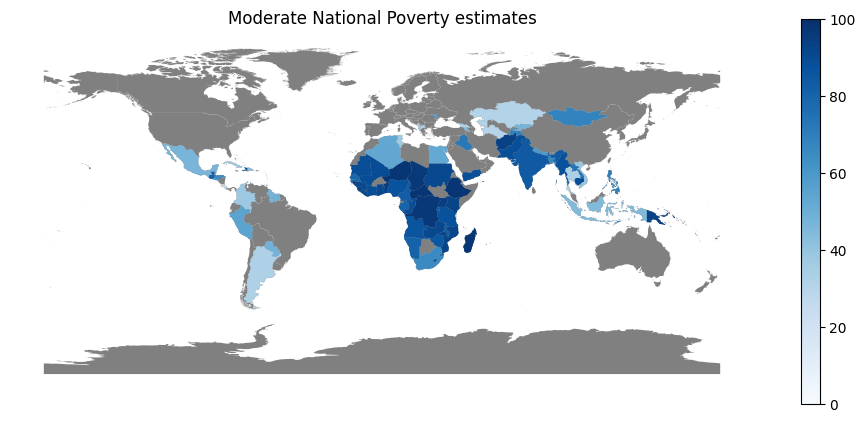

In [10]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')
# Plot countries with national poverty estimates
adm0.plot(ax=ax, column='nat_deprived_mod', cmap='Oranges', legend=True, vmin=0, vmax=100)

plt.title('Moderate National Poverty estimates')
plt.axis('off')
plt.show()


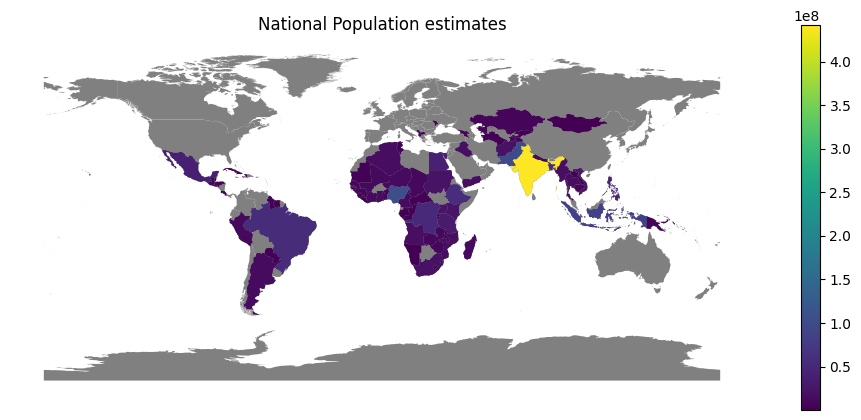

In [11]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')
# Plot countries with national poverty estimates
adm0.plot(ax=ax, column='popnational0017', cmap='viridis', legend=True)

plt.title('National Population estimates')
plt.axis('off')
plt.show()


# EDA

In [17]:
# Calculate the correlation matrix
correlation_matrix = adm0.drop(columns=['countrycode', 'survey', 'shapeGroup', 'geometry']).corr()

# Get the correlation of each feature with 'sev' and sort them in descending order
most_correlated_features = correlation_matrix['nat_deprived_sev'].sort_values(ascending=False)

# Select the top N correlated features
num_features = 10  # Change this number as needed
top_features = most_correlated_features[:num_features]

# Create a subset DataFrame with the top correlated features
subset_data = adm0[top_features.index]

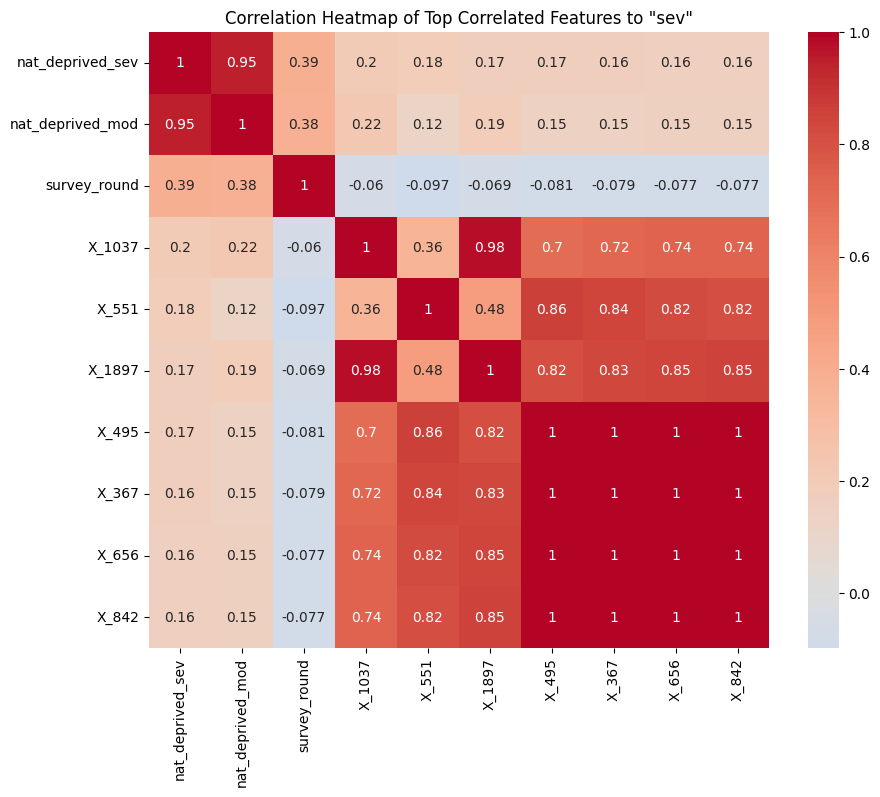

In [20]:
# Create a correlation heatmap for the subset of features
plt.figure(figsize=(10, 8))
sns.heatmap(subset_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Top Correlated Features to "sev"')
plt.show()


<Axes: >

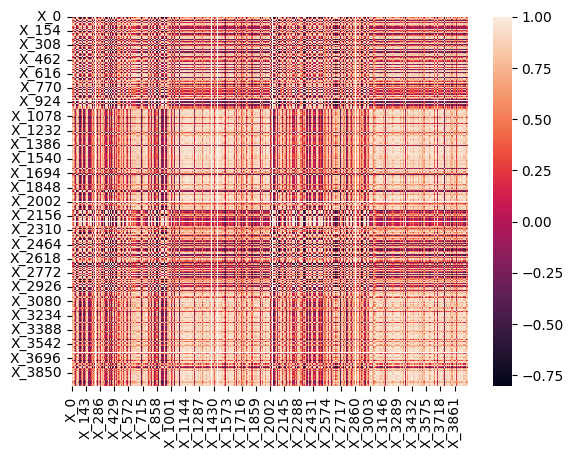

In [15]:
# check if the features are highly correlated between each other
sns.heatmap(adm0[adm0.columns[7:]].corr())

# Preprocess

1. Deal with NAs
2. Standardize data

In [21]:
# Select rows with at least one NaN
rows_with_nan = adm0[adm0.isnull().any(axis=1)]

rows_with_nan
# BRA Brazil
# COL Colombia
# COM Comoros 
# DOM the Dominica Republic
# MDA Moldova
# MNE Montenegro

,countrycode,survey,survey_round,year_chpov,nat_deprived_sev,nat_deprived_mod,popnational0017,X_0,X_1,X_2,...,X_3990,X_3991,X_3992,X_3993,X_3994,X_3995,X_3996,X_3997,X_3998,X_3999
9,BRA,NaN,NaN,NaN,NaN,NaN,53936476.0,0.269763,0.676142,0.112812,...,0.587503,0.292040,0.857482,0.582795,0.450304,1.371290,2.564234,0.961966,0.938925,0.181734
15,COL,DHS,71.0,2015.0,19.797577,37.977715,NaN,0.166871,0.358064,0.120616,...,0.310700,0.216525,0.629925,0.373414,0.248967,0.617713,1.797813,0.442655,0.365189,0.146124
16,COM,DHS,61.0,2012.0,74.577454,89.315956,358418.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,DOM,MICS,6.0,2019.0,12.016769,42.625885,NaN,0.236522,0.506718,0.165341,...,0.527492,0.365871,0.954391,0.595191,0.414126,0.974939,2.501038,0.663510,0.644108,0.225370
43,MDA,MICS,4.0,2012.0,33.806221,57.777725,706748.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,MNE,MICS,6.0,2018.0,12.912652,32.318954,137460.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Of the previous 6 countries:
* COM; MDA and MNE have missing mosaiks features, so I drop these variables from modelling.
* BRA has missing target variables
* COL and DOM ha missing population estimates, so I can include them in the computation

In [24]:
adm0 = adm0[adm0['countrycode'].isin(['BRA', 'COM', 'MDA', 'MNE'])==False].copy()

# Model

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
X = adm0[adm0.columns[7:]].copy()
y = adm0['nat_deprived_sev']


In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Standardize the features separately for training and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
# Initialize the Lasso regression model
lasso_model = Lasso(alpha=0.5)  # You can adjust the alpha value (regularization strength)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = elastic_net.predict(X_train_scaled)

# Make predictions on the test data
y_test_pred = elastic_net.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error and R-squared
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error: {mse_train:.2f}")
print(f"Training R-squared: {r2_train:.2f}")
print()
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Training Mean Squared Error: 3489.73
Training R-squared: -4.35

Mean Squared Error: 591.75
R-squared: 0.22


/home/marina/miniconda3/envs/unicef_iraq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/home/marina/miniconda3/envs/unicef_iraq/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


In [100]:
# Create and fit the Elastic Net model
alpha = 0.48  # L1 regularization parameter
l1_ratio = 0.435  # L1 to L2 ratio
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elastic_net.fit(X_train, y_train)

# TRAINING
# Make predictions on the training data
y_train_pred = elastic_net.predict(X_train)

# Calculate mean squared error and R-squared
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error: {mse_train:.2f}")
print(f"Training R-squared: {r2_train:.2f}")
print()

# TEST
# Make predictions
y_pred = elastic_net.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Coefficients of the model
print("Coefficients:", elastic_net.coef_)

Training Mean Squared Error: 380.14
Training R-squared: 0.42

Mean Squared Error: 591.75
R-squared: 0.22
Coefficients: [-0.  0. -0. ...  0.  0. -0.]


/home/marina/miniconda3/envs/unicef_iraq/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.352e+00, tolerance: 4.176e+00
  model = cd_fast.enet_coordinate_descent(


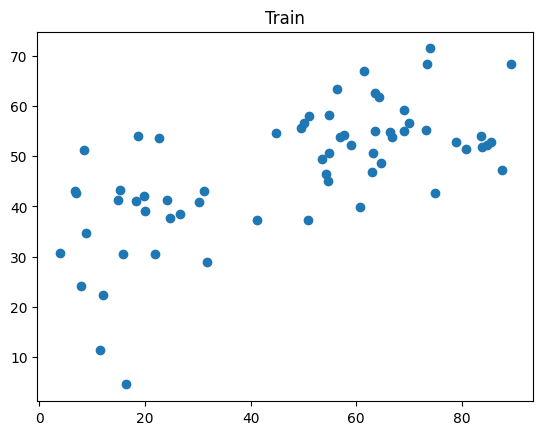

Text(0.5, 1.0, 'Test')

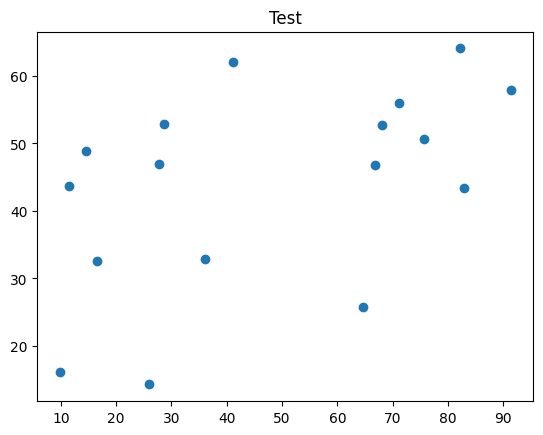

In [101]:
plt.scatter(y_train, y_train_pred)
plt.title('Train')
plt.show()

plt.scatter(y_test, y_pred)
plt.title('Test')